# Gendered Language Analysis in "The Awakening"

**Objective:**  
Analyze the frequency and trends of gendered words in Kate Chopin's "The Awakening" to explore how gender norms are represented throughout the novel.

**Dataset:**  
- Source: Project Gutenberg  
- Text: "The Awakening" by Kate Chopin (1899)

**Methodology:**  
1. Load and clean the raw text (remove headers/footers).
2. Split the novel into chapters.
3. Tokenize each chapter and remove stopwords.
4. Track and visualize the frequency of gendered words per chapter.
5. Summarize findings and discuss limitations.

In [1]:
# Download NLTK stopwords if not already present
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mario\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Load & Clean the Raw Text

In [2]:
import re
from nltk.corpus import stopwords

def load_and_split_by_roman(filepath):
    with open(filepath, 'r', encoding='utf-8') as f:
        text = f.read()

    # Split the text into chapters based on Roman numeral headings
    chapters = re.split(r'\n+(?=[IVXLCDM]+\s*\n)', text)
    return chapters

In [3]:
the_awakening_path = 'data/EN_1899_Chopin,Kate_TheAwakening_Novel.txt'
chapters = load_and_split_by_roman(the_awakening_path)

# Example usage, that we used here
# for i, chapter in enumerate(chapters):
#     print(f"Chapter {i+1}:\n{chapter[:100]}...\n")  # Print the first 100 characters of each chapter

In [4]:
def tokenize_each_Chapter(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    tokens = text.lower().split()  # Normalize to lowercase and split into words
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [5]:
print(tokenize_each_Chapter(chapters[0]))  # Example tokenization of the first chapter

['green', 'yellow', 'parrot', 'hung', 'cage', 'outside', 'door', 'kept', 'repeating', 'allez', 'vousen', 'allez', 'vousen', 'sapristi', 'thats', 'right', 'could', 'speak', 'little', 'spanish', 'also', 'language', 'nobody', 'understood', 'unless', 'mockingbird', 'hung', 'side', 'door', 'whistling', 'fluty', 'notes', 'upon', 'breeze', 'maddening', 'persistence', 'mr', 'pontellier', 'unable', 'read', 'newspaper', 'degree', 'comfort', 'arose', 'expression', 'exclamation', 'disgust', 'walked', 'gallery', 'across', 'narrow', 'bridges', 'connected', 'lebrun', 'cottages', 'one', 'seated', 'door', 'main', 'house', 'parrot', 'mockingbird', 'property', 'madame', 'lebrun', 'right', 'make', 'noise', 'wished', 'mr', 'pontellier', 'privilege', 'quitting', 'society', 'ceased', 'entertaining', 'stopped', 'door', 'cottage', 'fourth', 'one', 'main', 'building', 'next', 'last', 'seating', 'wicker', 'rocker', 'applied', 'task', 'reading', 'newspaper', 'day', 'sunday', 'paper', 'day', 'old', 'sunday', 'pape

Tokenize The Chapters

In [6]:
tokenize_each_Chapter = [tokenize_each_Chapter(ch) for ch in chapters]

In [7]:
#Create a list of target words to track (expanded)
gender_words = [
    "woman", "man", "girl", "boy", "mother", "father", "daughter", "son", "sister", "brother",
    "wife", "husband", "lady", "gentleman", "female", "male", "feminine", "masculine",
    "weak", "strong", "emotional", "ladylike", "gentle", "tough", "nurturing", "assertive",
    "independent", "obedient", "dominant", "submissive"
]

In [8]:
from collections import Counter

# Create a function to count occurrences of the target words in each chapter
def count_gender_terms(token_Chapters, gender_words):
    # Create a dictionary to hold the counts for each word from the chapters
    trend = {word: [] for word in gender_words}

    # Iterate through each chapter and count occurrences of the target words
    for chapter in token_Chapters:
        word_count = Counter(chapter)
        for word in gender_words:
            trend[word].append(word_count.get(word, 0))
    return trend

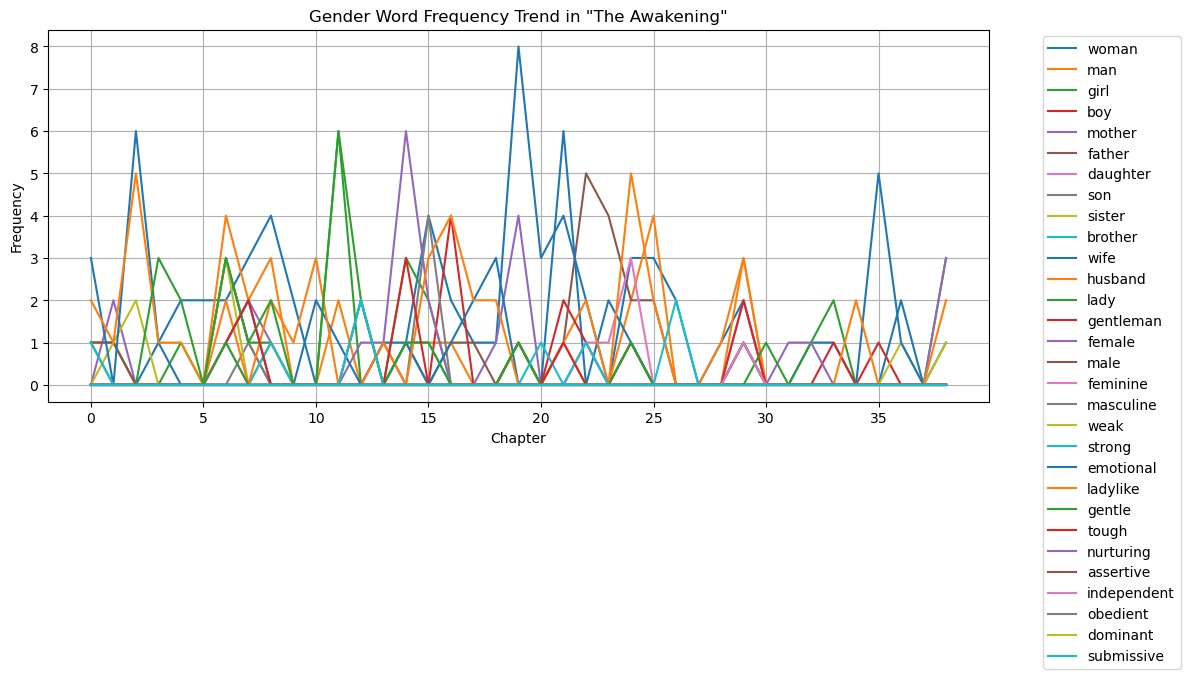

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Count occurrences of gender-related terms in each chapter
trend_data = count_gender_terms(tokenize_each_Chapter, gender_words)

# Plots the words in gender_words
for word in gender_words:
    plt.plot(trend_data[word], label=word)

plt.title('Gender Word Frequency Trend in "The Awakening"')
plt.xlabel('Chapter')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
# Save trend data to CSV for reproducibility, and is useful for future
df = pd.DataFrame(trend_data)
df.to_csv('gender_word_trends.csv', index=False)
print(df.head())

   woman  man  girl  boy  mother  father  daughter  son  sister  brother  ...  \
0      1    1     0    0       0       1         0    0       0        0  ...   
1      1    1     0    0       2       1         0    0       1        0  ...   
2      0    0     0    0       0       0         0    0       2        0  ...   
3      1    0     0    0       0       0         0    0       0        0  ...   
4      2    0     1    0       0       0         0    0       0        0  ...   

   emotional  ladylike  gentle  tough  nurturing  assertive  independent  \
0          0         0       0      0          0          0            0   
1          0         0       0      0          0          0            0   
2          0         0       0      0          0          0            0   
3          0         0       0      0          0          0            0   
4          0         0       0      0          0          0            0   

   obedient  dominant  submissive  
0         0         

Total Gendered Words Per Chapter

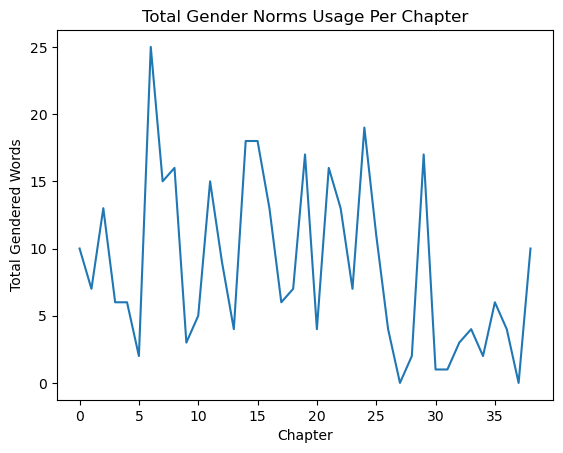

In [11]:
total_per_chapter = [
    sum(trend_data[word][i] for word in gender_words)
    for i in range(len(tokenize_each_Chapter))
]

plt.plot(total_per_chapter)
plt.xlabel("Chapter")
plt.ylabel("Total Gendered Words")
plt.title("Total Gender Norms Usage Per Chapter")
plt.show()


## Results & Discussion

- The frequency of gendered words fluctuates across chapters, with certain terms like, "woman", "man" appearing more frequently.
- Peaks in gendered word usage could tell us or may correspond to key plot events or character developments.
- The overall trend we found suggests that gendered language is woven throughout the narrative, reflecting the novel's focus on gender roles and expectations.

**Limitations:**  
- Simple word counts do not capture context or sentiment.  
- Some gendered words may be used in non-gendered contexts.

**Future Work:**  
- Use NLP techniques for sentiment/context analysis.  
- Compare with other novels for broader trends.

## Additional Analysis - Sentiment of Gendered Contexts

To go beyond word counts, we are checking the sentiment of sentences containing gendered words. This gives us more insight into how gender is discussed in the novel.

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Loading again the text for sentence level analysis
with open(the_awakening_path, 'r', encoding='utf-8') as f:
    full_text = f.read()

# Split into sentences
import nltk.data
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sentences = sent_detector.tokenize(full_text.strip())

# Find sentences with gendered words
gender_sentences = [s for s in sentences if any(word in s.lower() for word in gender_words)]

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = [sia.polarity_scores(s)['compound'] for s in gender_sentences]

# Summary statistics
import numpy as np
mean_sentiment = np.mean(sentiment_scores)
print(f"Average sentiment of gendered sentences: {mean_sentiment:.3f}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average sentiment of gendered sentences: 0.120


### Interpretation
- The average sentiment of sentences containing gendered words provides a rough sense of whether gendered contexts are positive, negative, or neutral overall.
- For deeper insight, plotting the distribution of sentiment scores or comparing them across chapters could be done here.

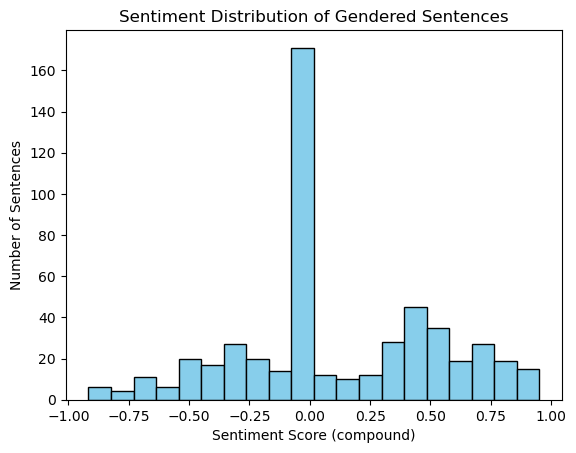

In [13]:
#Plotting sentiment distribution
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of Gendered Sentences')
plt.xlabel('Sentiment Score (compound)')
plt.ylabel('Number of Sentences')
plt.show()